# Projeto Análise de Dados 1

- Publishing Year: Ano de publicação do livro. (Numeric)
- Book Name: Título do livro. (Text)
- Author: Nome do autor. (Text)
- language_code: Código que representa a linguagem em que o livro foi escrito. (Text)
- Author_Rating: Rating do autor baseado em trabalhos prévios. (Numeric)
- Book_average_rating: Rating médio dado ao livro pelos leitores. (Numeric)
- Book_ratings_count: Número de ratings dados pelos leitores. (Numeric)
- genre: Gênero do livro. (Text)
- gross sales: Total de receita gerada pelas vendas do livro. (Numeric)
- publisher revenue: A receita recebida pela publicadora do livro. (Numeric)
- sale price: Preço de vendo do livro. (Numeric)
- sales rank: Ranking da venda do livro. (Numeric)
- units sold: Número de unidades vendidas. (Numeric)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Books_Data_Clean.csv')
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [ ]:
# verificação resumida
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

In [ ]:
# quantidade de nulos
df.isna().sum()

index                   0
Publishing Year         1
Book Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [5]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [7]:
df = df[df['Publishing Year'] >= 1900]

In [10]:
# quantidade de nulos
df.isna().sum()

index                   0
Publishing Year         0
Book Name               0
Author                  0
language_code          47
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [ ]:
# retirando as linhas sem o nome do livro
df = df[~df["Book Name"].isna()]

In [12]:
# verificação das duplicidade
df.duplicated().sum()

0

In [13]:
# verificação dos valores nulos
df.nunique()

index                  988
Publishing Year        101
Book Name              987
Author                 669
language_code            8
Author_Rating            4
Book_average_rating    133
Book_ratings_count     983
genre                    4
gross sales            774
publisher revenue      570
sale price             143
sales rank             818
Publisher                9
units sold             470
dtype: int64

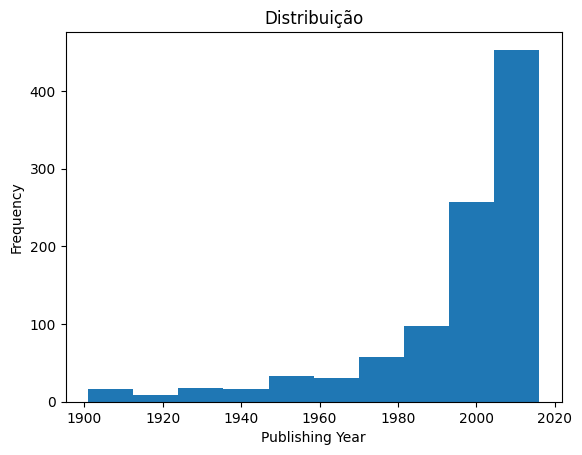

In [15]:
plt.hist(df['Publishing Year'])
plt.xlabel('Publishing Year')
plt.ylabel('Frequency')
plt.title('Distribuição');

In [16]:
df['genre'].value_counts()

genre
genre fiction    759
nonfiction       160
fiction           54
children          15
Name: count, dtype: int64

In [17]:
# correção do nome de genero
df['genre'] = df['genre'].apply(lambda genre: "fiction" if genre == "genre fiction" else genre)

In [18]:
df['genre'].value_counts()

genre
fiction       813
nonfiction    160
children       15
Name: count, dtype: int64

<Axes: xlabel='genre'>

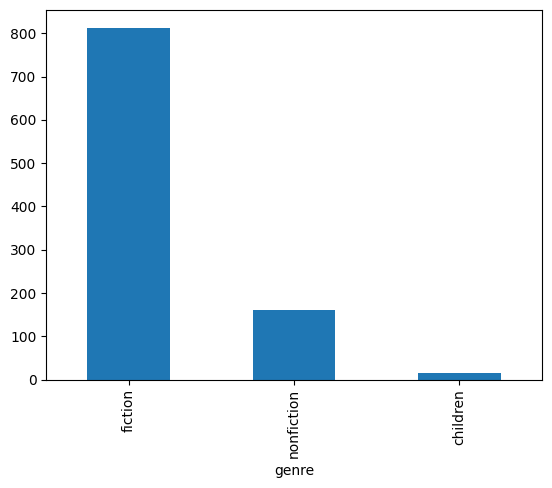

In [19]:
df["genre"].value_counts().plot(kind="bar")

In [20]:
df.groupby("Author")["Book_average_rating"].mean().sort_values(ascending=False)

Author
Bill Watterson                  4.650000
Bill Watterson, G.B. Trudeau    4.610000
J.R.R. Tolkien                  4.590000
George R.R. Martin              4.560000
Sarah J. Maas                   4.526000
                                  ...   
Chetan Bhagat                   3.273333
Audrey Niffenegger              3.230000
Herman Koch, Sam Garrett        3.220000
P.D. James                      3.210000
Sue Monk Kidd                   3.100000
Name: Book_average_rating, Length: 669, dtype: float64

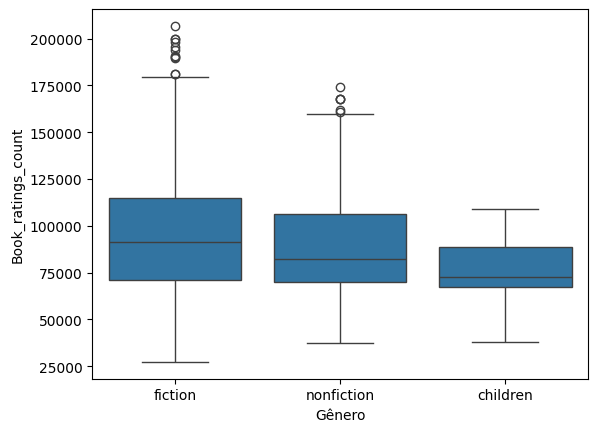

In [24]:
sns.boxplot(x="genre", y="Book_ratings_count", data=df)
plt.xlabel("Gênero");

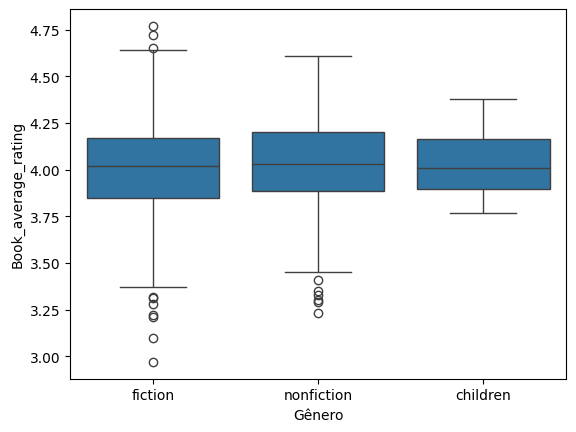

In [23]:
sns.boxplot(x="genre", y="Book_average_rating", data=df)
plt.xlabel("Gênero");

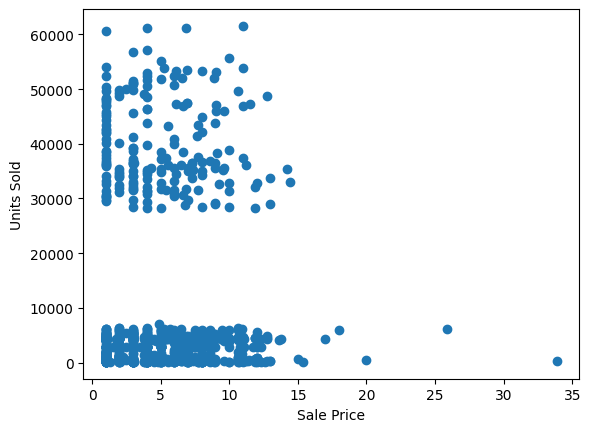

In [26]:
plt.scatter(df["sale price"], df["units sold"])
plt.xlabel("Sale Price")
plt.ylabel("Units Sold");

In [27]:
df["language_code"].value_counts()

language_code
eng      670
en-US    226
en-GB     29
en-CA      7
fre        4
spa        2
ara        2
nl         1
Name: count, dtype: int64

In [28]:
language_counts = df["language_code"].value_counts()

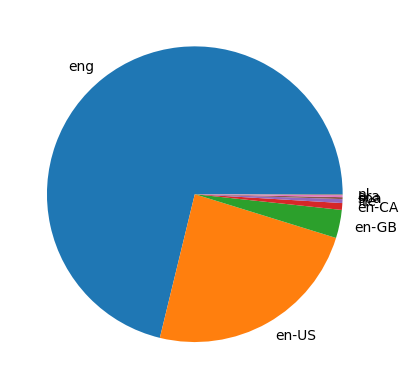

In [30]:
plt.pie(language_counts, labels=language_counts.index);